## Anomaly detection for fan using simple Autoencoder

## 0) Import all librairies

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import librosa
import os
import librosa.display

## 1) Import data files

Each audio file is $10s.$ long and sampled at $16 kHZ$. Multiple channel are overlapping on this plot. Following the recommandation of the MIMII github, only the first channel should be used to plot Spectrograms.

In [131]:
def import_data(wav_name,channel=0):
    try:
        multi_channel_data, sr = sf.read(wav_name)
        if multi_channel_data.ndim <= 1:
            return sr, multi_channel_data
        return sr, np.array(multi_channel_data)[:,channel]
    except ValueError as msg:
        logger.warning(f'{msg}')

## 1) Data exploration

In [87]:
data_path = 'MIMII/RawData/fan/id_02/normal/00000015.wav'

In [88]:
user_path = 'C:/Users/carbo/Documents/'
fs, audio = import_data(user_path + data_path)

In [89]:
fs

16000

In [90]:
audio

array([ 3.99780273e-03, -1.15966797e-03,  3.32641602e-03, ...,
       -1.11389160e-02,  3.05175781e-05, -3.44848633e-03])

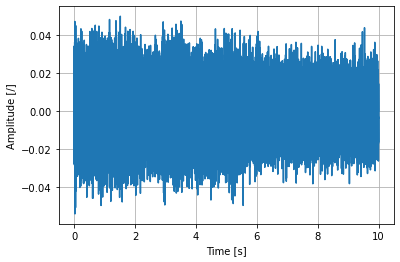

In [91]:
x_vector = np.arange(len(audio))
plt.grid()
plt.plot(x_vector/16000,audio)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [/]')
plt.show()

Look onto normal fan data

In [92]:
S = librosa.feature.melspectrogram(y=audio,
                                                     sr=fs,
                                                     #fmax=8000   default is sr/2
                                                     n_fft=1024,
                                                     hop_length= round(1024*0.5),
                                                     #n_mels=n_mels,
                                                     power=1
                                                )
S_dB = librosa.power_to_db(S)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

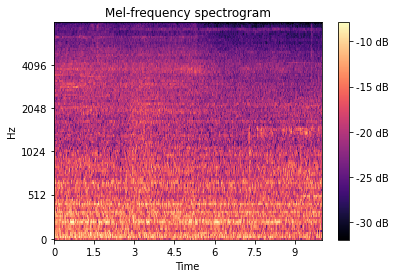

In [93]:
# Spectrogram plot

fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')


In [94]:
S_dB.shape

(128, 313)

Look onto abnormal fan data

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

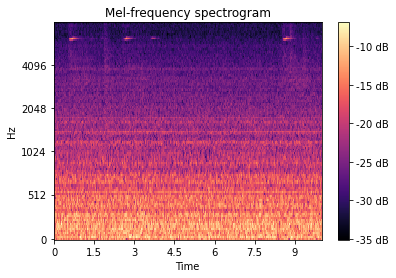

In [116]:
data_path = 'MIMII/RawData/fan/id_04/abnormal/00000018.wav'

fs, audio = import_data(user_path + data_path)

S = librosa.feature.melspectrogram(y=audio,
                                                     sr=fs,
                                                     #fmax=8000   default is sr/2
                                                     n_fft=1024,
                                                     hop_length= round(1024*0.5), # overlap
                                                     #n_mels=n_mels,
                                                     power=1 # 1 for energy, 2 for power
                                                )
S_dB = librosa.power_to_db(S)

# Spectrogram plot


fig, ax = plt.subplots()
img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=16000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')



In [117]:
S_dB.shape

(128, 313)

In [118]:
S_dB_flat = S_dB.flatten()  # flatten the matrix to 1D vector (raw-wise)
len(S_dB_flat)

40064

## 2) Create CSV files

- Create a spectrogram for each $.wav$ files
- Save the spectrogram as list in a DF
- Save the DF as CSV

In [119]:
def Spectro_DataFrame_Maker(user_path,data_path):
    # The data_path must be CSV files of
    # 1) all same length
    # 2) audio data
    your_path = user_path+data_path
    files = os.listdir(your_path)
    df = pd.DataFrame()
    
    S_dB_list = []
    for index,file in enumerate(files):
        if os.path.isfile(os.path.join(your_path,file)):
            fs, audio = import_data(os.path.join(your_path,file))
            S = librosa.feature.melspectrogram(y=audio,
                                                     sr=fs,
                                                     #fmax=8000   default is sr/2
                                                     n_fft=1024,
                                                     hop_length= round(1024*0.5),
                                                     #n_mels=n_mels,
                                                     power=1
                                                )
            S_dB = librosa.power_to_db(S)
            S_dB_flat = S_dB.flatten()  # flatten the matrix to 1D vector (raw-wise)
            S_dB_list.append(S_dB_flat)
    return pd.DataFrame(S_dB_list)



In [126]:
data_path = 'MIMII/RawData/fan/id_00/abnormal'
user_path = 'C:/Users/carbo/Documents/'
df_spectro = Spectro_DataFrame_Maker(user_path,data_path)

In [128]:
df_spectro.head()

,0,1,2,3,4,5,6,7,8,9,...,40054,40055,40056,40057,40058,40059,40060,40061,40062,40063
0,-19.630696,-18.643090,-17.375721,-19.176663,-18.586342,-15.437630,-19.443008,-20.844858,-20.670322,-17.964497,...,-27.563798,-27.267295,-28.304909,-26.675156,-27.441149,-26.288414,-28.667042,-27.399984,-27.223676,-27.271652
1,-12.763670,-15.052857,-11.434226,-12.791490,-14.722293,-13.379125,-15.292832,-11.310933,-13.918544,-11.391480,...,-32.156031,-31.835213,-32.018756,-31.785439,-32.251909,-31.637233,-31.419009,-30.898618,-30.686309,-29.395650
2,-15.449400,-16.128278,-15.586872,-18.247536,-18.026746,-13.830616,-17.247151,-15.776499,-16.054907,-16.655117,...,-32.285368,-32.115433,-34.290745,-33.367566,-32.926697,-32.094773,-32.240860,-31.701646,-32.083495,-32.815015
3,-18.701555,-18.193095,-17.656577,-20.113172,-16.361810,-17.715704,-17.613369,-19.113266,-18.864915,-16.414762,...,-27.800502,-28.507352,-27.834166,-28.239806,-28.012621,-28.962160,-26.217114,-28.269674,-26.461972,-29.107465
4,-16.803928,-15.685395,-19.272730,-16.168291,-15.472632,-17.176391,-15.100463,-14.064397,-16.325156,-18.527298,...,-32.243153,-30.885079,-30.087230,-30.697170,-29.749473,-31.073142,-31.036035,-29.989651,-30.772477,-30.469688


In [129]:
writer_path = 'C:/Users/carbo/Documents/MIMII/CSV_Data/Spectrogram/'
data_name = 'normalData_fan_00.csv'

In [130]:
df_spectro.to_csv(writer_path + data_name, index=False)